<a href="https://colab.research.google.com/github/teiabessa/dio-lab-open-source/blob/main/rgb_cinza_binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [45]:
!echo "Downloading lena image notebooks"
#Download the Lenna file
!wget https://github.com/teiabessa/Datasets/raw/main/Lenna.jpg -O Lenna.jpg
!ls

--2025-01-24 01:18:31--  https://github.com/teiabessa/Datasets/raw/main/Lenna.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/teiabessa/Datasets/main/Lenna.jpg [following]
--2025-01-24 01:18:31--  https://raw.githubusercontent.com/teiabessa/Datasets/main/Lenna.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68800 (67K) [image/jpeg]
Saving to: ‘Lenna.jpg’

Lenna.jpg           100%[===================>]  67.19K  --.-KB/s    in 0.02s   

2025-01-24 01:18:31 (3.08 MB/s) - ‘Lenna.jpg’ saved [68800/68800]

Lenna.jpg  sample_data


In [46]:
def rgbtogrey(imagem_path):
    """
    Converts an RGB image to grayscale using The luminosity method. That is
     a technique for converting a color image into a grayscale image.
     It takes into account human color perception by assigning different
     weights to RGB components.

    Args:
        imagem_path (str): The path to the image file.

    Returns:
        list: A 2D list representing the grayscale image.
    """
    # Open the image using Pillow library
    imagem = Image.open(imagem_path)
    # Get image dimensions
    largura, altura = imagem.size

    # Create a new list to store the grayscale values
    imagem_cinza = [[0] * largura for _ in range(altura)]

    # Iterate over each pixel of the image
    for y in range(altura):
        for x in range(largura):
            # Get the RGB values of the current pixel
            r, g, b = imagem.getpixel((x, y))[:3] # Get RGB and ignore alpha if present

            # Calculate the grayscale value using the luminosity method
            valor_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)

            # Set the grayscale value in the new image
            #Swapping the x and y axes is necessary to ensure that
            #the grayscale values are stored in the correct position in the list
            imagem_cinza[y][x] = valor_cinza

    return imagem_cinza



In [47]:
def greytobinary(imagem_cinza, limiar=127):
    """
    Converts a grayscale image to a binary (black and white) image using a threshold.

    Args:
        imagem_cinza (list): A 2D list representing the grayscale image.
        limiar (int): The threshold value for binarization (default is 127).

    Returns:
        list: A 2D list representing the binary image.
    """
    altura = len(imagem_cinza)
    largura = len(imagem_cinza[0])

    # Create a new list to store the binary values
    imagem_binaria = [[0] * largura for _ in range(altura)]

    # Iterate over each pixel of the grayscale image
    for y in range(altura):
        for x in range(largura):
            # Apply the threshold to convert to black and white
            if imagem_cinza[y][x] > limiar:
                imagem_binaria[y][x] = 255
            else:
                imagem_binaria[y][x] = 0

    return imagem_binaria

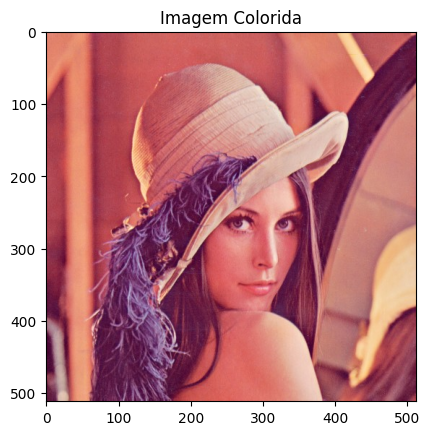

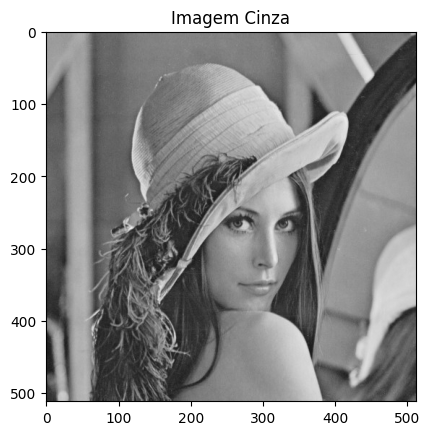

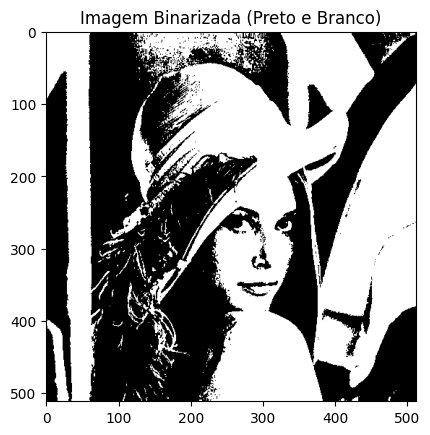

In [48]:
# Supondo que 'imagem' seja uma lista 2D de tuplas RGB representando a imagem
imagem= "Lenna.jpg"
imagem_cinza = rgbtogrey(imagem)
imagem_binaria = greytobinary(imagem_cinza)
#print(imagem_cinza)

plt.imshow(Image.open(imagem))
plt.title('Imagem Colorida')
plt.show()

plt.imshow(imagem_cinza, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Cinza')
plt.show()
# Display the binary image
plt.imshow(imagem_binaria, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Binarizada (Preto e Branco)')
plt.show()

